# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

Step 0 Mounting the files on Colab : this prevents any errors regarding file location, which are common in Google Colab

In [96]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import os

project_path = "/content/drive/MyDrive"
os.chdir(project_path)

print("Current directory:", os.getcwd())
print("Files:", os.listdir())


Current directory: /content/drive/MyDrive
Files: ['Colab Notebooks', 'IMG_20190406_112419.jpg', 'updated cv.docx', 'IMG_6003.jpg', 'IMG_6241.heic', 'IMG_6229.HEIC', 'IMG_6230.HEIC', 'IMG_6231.HEIC', 'IMG_6247.heic', 'IMG_6265.heic', 'IMG_6266.heic', 'IMG_6267.heic', 'IMG_6347.heic', 'IMG_6348.heic', 'IMG_6352.heic', 'IMG_6367.heic', 'IMG_6400.heic', 'IMG_6387.heic', 'IMG_6388.heic', 'IMG_6389.heic', 'IMG_6408.heic', 'IMG_6409.heic', 'IMG_6410.heic', 'IMG_6412.heic', 'IMG_6585.heic', 'IMG_6584.heic', 'IMG_2401.JPG', 'IMG_2402.JPG', 'IMG_6646.MOV', 'IMG_5604.HEIC', 'IMG_5605.HEIC', 'IMG_5579.HEIC', 'IMG_5578.HEIC', 'IMG_5606.HEIC', 'IMG_5588.HEIC', 'IMG_5580.HEIC', 'IMG_5587.HEIC', 'IMG_5610.HEIC', 'IMG_5601.HEIC', 'IMG_5661.JPG', 'IMG_5779.HEIC', 'IMG_5778.HEIC', 'IMG_5784.HEIC', 'IMG_5666.HEIC', 'IMG_5780.HEIC', 'IMG_5796.heic', 'IMG_5781.HEIC', 'IMG_5811.HEIC', 'IMG_5808.HEIC', 'IMG_5810.HEIC', 'IMG_5812.HEIC', 'IMG_5814.HEIC', 'IMG_5815.heic', 'IMG_5816.heic', 'IMG_5817.heic', 'IMG_5

In [98]:
import os

project_path = "/content/drive/MyDrive"
os.chdir(project_path)

print("Current directory:", os.getcwd())
print("Files:", os.listdir())


Current directory: /content/drive/MyDrive
Files: ['Colab Notebooks', 'IMG_20190406_112419.jpg', 'updated cv.docx', 'IMG_6003.jpg', 'IMG_6241.heic', 'IMG_6229.HEIC', 'IMG_6230.HEIC', 'IMG_6231.HEIC', 'IMG_6247.heic', 'IMG_6265.heic', 'IMG_6266.heic', 'IMG_6267.heic', 'IMG_6347.heic', 'IMG_6348.heic', 'IMG_6352.heic', 'IMG_6367.heic', 'IMG_6400.heic', 'IMG_6387.heic', 'IMG_6388.heic', 'IMG_6389.heic', 'IMG_6408.heic', 'IMG_6409.heic', 'IMG_6410.heic', 'IMG_6412.heic', 'IMG_6585.heic', 'IMG_6584.heic', 'IMG_2401.JPG', 'IMG_2402.JPG', 'IMG_6646.MOV', 'IMG_5604.HEIC', 'IMG_5605.HEIC', 'IMG_5579.HEIC', 'IMG_5578.HEIC', 'IMG_5606.HEIC', 'IMG_5588.HEIC', 'IMG_5580.HEIC', 'IMG_5587.HEIC', 'IMG_5610.HEIC', 'IMG_5601.HEIC', 'IMG_5661.JPG', 'IMG_5779.HEIC', 'IMG_5778.HEIC', 'IMG_5784.HEIC', 'IMG_5666.HEIC', 'IMG_5780.HEIC', 'IMG_5796.heic', 'IMG_5781.HEIC', 'IMG_5811.HEIC', 'IMG_5808.HEIC', 'IMG_5810.HEIC', 'IMG_5812.HEIC', 'IMG_5814.HEIC', 'IMG_5815.heic', 'IMG_5816.heic', 'IMG_5817.heic', 'IMG_5

In [99]:
FILES = {
    "AMZN": "AMZN_stocks_data.csv",
    "GOOGL": "GOOGL_stocks_data.csv",
    "IBM": "IBM_stocks_data.csv",
    "MSFT": "MSFT_stocks_data.csv"
}


In [100]:
import pandas as pd

for company, file in FILES.items():
    df = pd.read_csv(file)
    print(company, "→", df.shape)


AMZN → (3019, 7)
GOOGL → (3019, 7)
IBM → (3020, 7)
MSFT → (3019, 7)


The datasets files are stored in Google Drive and accessed in Google
Colab by mounting the drive and setting the working directory accordingly. File names were managed using a dictionary to avoid hard-coded paths and ensure reproducibility.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [101]:
# Import libraries

# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler #minmaxscaler is used because stock prices vary wildly and Rnn performs better with scaled data
from sklearn.model_selection import train_test_split

# Deep learning (RNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam


Standard Python libraries such as NumPy and Pandas were used for data handling, while TensorFlow Keras was used to implement an LSTM-based recurrent neural network.
why LSTM and not Vanilla RNN: to avoid vanishing gradients.

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [102]:
# Define a function to load data and aggregate them
def load_and_aggregate_stock_data(file_dict):
    """
    Loads stock data from multiple CSV files and aggregates them into a single DataFrame.

    Parameters:
    file_dict (dict): Dictionary mapping company names to CSV file paths

    Returns:
    pd.DataFrame: Combined stock data for all companies
    """

    dataframes = []

    for company, file_path in file_dict.items():
        df = pd.read_csv(file_path)

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Add company identifier
        df['Company'] = company

        dataframes.append(df)

    # Concatenate all company data
    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df


In [103]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files


# Aggregate stock data from all companies
stock_df = load_and_aggregate_stock_data(FILES)

# Display basic info
print("Shape of combined dataset:", stock_df.shape)
stock_df.head()


Shape of combined dataset: (12077, 8)


,Date,Open,High,Low,Close,Volume,Name,Company
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,AMZN


In [104]:
# View specifics of the data


stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12077 non-null  datetime64[ns]
 1   Open     12076 non-null  float64       
 2   High     12077 non-null  float64       
 3   Low      12076 non-null  float64       
 4   Close    12077 non-null  float64       
 5   Volume   12077 non-null  int64         
 6   Name     12077 non-null  object        
 7   Company  12077 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 754.9+ KB


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [105]:
# Handle Missing Values

stock_df.isnull().sum()

,0
Date,0
Open,1
High,0
Low,1
Close,0
Volume,0
Name,0
Company,0


In [106]:
# Sort data by Company and Date for time-series correctness
stock_df = stock_df.sort_values(by=['Company', 'Date'])
stock_df.reset_index(drop=True, inplace=True)


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

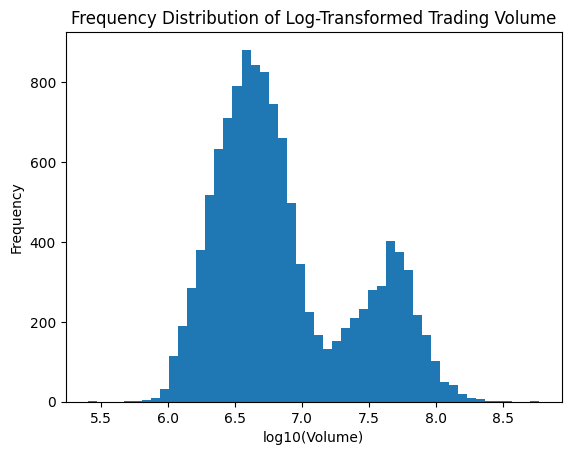

In [107]:
# Frequency distribution of volumes

plt.figure()
plt.hist(np.log10(stock_df['Volume']), bins=50)
plt.title("Frequency Distribution of Log-Transformed Trading Volume")
plt.xlabel("log10(Volume)")
plt.ylabel("Frequency")
plt.show()



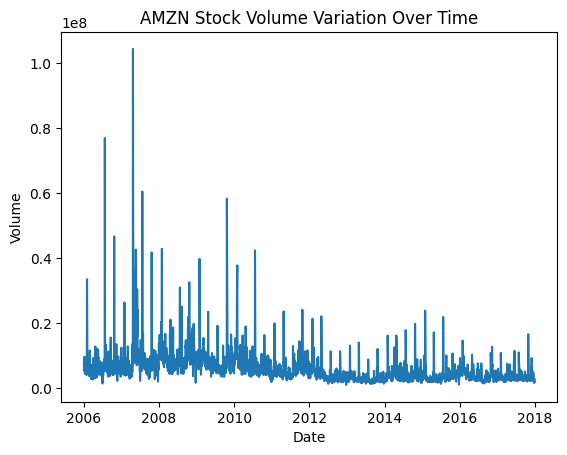

In [108]:
# Stock volume variation over time

amzn_df = stock_df[stock_df['Company'] == 'AMZN']

plt.figure()
plt.plot(amzn_df['Date'], amzn_df['Volume'])
plt.title("AMZN Stock Volume Variation Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

In [109]:
# Analyse correlations

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr_matrix = stock_df[numeric_cols].corr()
corr_matrix


,Open,High,Low,Close,Volume
Open,1.000000,0.999945,0.999919,0.999873,-0.420741
High,0.999945,1.000000,0.999907,0.999935,-0.421083
Low,0.999919,0.999907,1.000000,0.999945,-0.420673
Close,0.999873,0.999935,0.999945,1.000000,-0.420875
Volume,-0.420741,-0.421083,-0.420673,-0.420875,1.000000


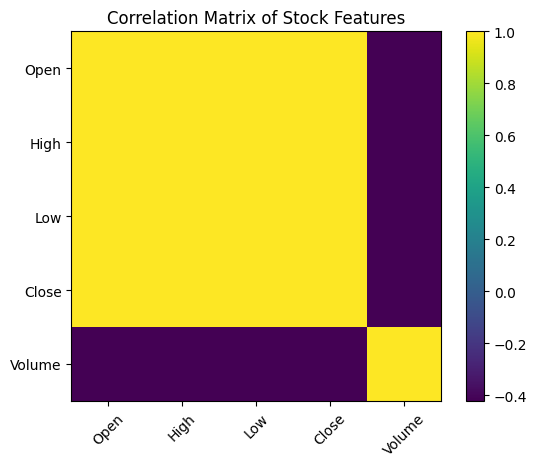

In [110]:
plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix of Stock Features")
plt.show()


The correlation analysis shows strong relationships among price-related features such as Open, High, Low, and Close, while Volume exhibits weaker correlation. Despite this, all features were retained to allow the RNN to learn complex temporal dependencies.

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [111]:
# Define a function that divides the data into windows and generates target variable values for each window

def create_windowed_data(df, feature_cols, target_col, window_size):
    """
    Creates windowed input-output pairs for RNN training.

    Parameters:
    df (pd.DataFrame): DataFrame sorted by Date
    feature_cols (list): List of feature column names
    target_col (str): Name of target column
    window_size (int): Number of past timesteps in each window

    Returns:
    X (np.array): Windowed input data
    y (np.array): Corresponding target values
    """

    X = []
    y = []

    for i in range(len(df) - window_size):
        X.append(df[feature_cols].iloc[i:i+window_size].values)
        y.append(df[target_col].iloc[i+window_size])

    return np.array(X), np.array(y)


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

In [112]:
from sklearn.preprocessing import MinMaxScaler

def scale_windowed_data(X_train, X_test, y_train, y_test):
    """
    Scales windowed input and target data for RNNs.

    Parameters:
    X_train, X_test (np.array): Windowed input data of shape (num_samples, window_size, num_features)
    y_train, y_test (np.array): Target values of shape (num_samples,)

    Returns:
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler
    """

    # Initialize scalers
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    # Reshape X to 2D for scaling: (num_samples*window_size, num_features)
    num_samples, window_size, num_features = X_train.shape
    X_train_2d = X_train.reshape(-1, num_features)
    X_test_2d = X_test.reshape(-1, num_features)

    # Fit scaler on training input only
    X_train_scaled_2d = X_scaler.fit_transform(X_train_2d)
    X_test_scaled_2d = X_scaler.transform(X_test_2d)

    # Reshape back to 3D
    X_train_scaled = X_train_scaled_2d.reshape(num_samples, window_size, num_features)
    X_test_scaled = X_test_scaled_2d.reshape(X_test.shape[0], window_size, num_features)

    # Reshape y to 2D for scaling
    y_train_2d = y_train.reshape(-1, 1)
    y_test_2d = y_test.reshape(-1, 1)

    # Fit scaler on training target only
    y_train_scaled = y_scaler.fit_transform(y_train_2d)
    y_test_scaled = y_scaler.transform(y_test_2d)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler


#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [113]:
# Define a function to create input and output data points from the master DataFrame


In [114]:
def preprocess_rnn_data(df, stocks, feature_cols, target_col='Close',
                        window_size=3, stride=1, train_ratio=0.8):
    """
    Preprocess the master stock dataset for RNN training.

    Parameters:
    df (pd.DataFrame): Master dataset sorted by Company and Date
    stocks (list): List of company names to include
    feature_cols (list): List of feature columns to use
    target_col (str): Column to predict (default: 'Close')
    window_size (int): Number of past timesteps in each window
    stride (int): Step size between windows
    train_ratio (float): Fraction of data to use for training

    Returns:
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler
    """

    X_all = []
    y_all = []

    # Loop over each company
    for stock in stocks:
        stock_df = df[df['Company'] == stock].reset_index(drop=True)

        # Create windows
        X_stock, y_stock = create_windowed_data(stock_df, feature_cols, target_col, window_size)

        # Apply stride
        X_stock = X_stock[::stride]
        y_stock = y_stock[::stride]

        # Append to master lists
        X_all.append(X_stock)
        y_all.append(y_stock)

    # Concatenate all companies
    X_all = np.concatenate(X_all, axis=0)
    y_all = np.concatenate(y_all, axis=0)

    # Train-test split
    split_idx = int(len(X_all) * train_ratio)
    X_train, X_test = X_all[:split_idx], X_all[split_idx:]
    y_train, y_test = y_all[:split_idx], y_all[split_idx:]

    # Scale the windowed data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler = \
        scale_windowed_data(X_train, X_test, y_train, y_test)

    return X_train_scaled, X_test_scaled, y_t_


In [115]:
# Function to scale multi-target data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def scale_windowed_data_multi(X_train, X_test, y_train, y_test):
    """
    Scale X and y for multi-target RNN
    """
    # Scale X: reshape to 2D
    num_samples, window_size, num_features = X_train.shape
    X_train_2d = X_train.reshape(-1, num_features)
    X_test_2d = X_test.reshape(-1, num_features)

    X_scaler = MinMaxScaler()
    X_train_scaled = X_scaler.fit_transform(X_train_2d).reshape(num_samples, window_size, num_features)
    X_test_scaled = X_scaler.transform(X_test_2d).reshape(X_test.shape[0], window_size, num_features)

    # Scale y: 2D for multi-target
    y_scaler = MinMaxScaler()
    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler


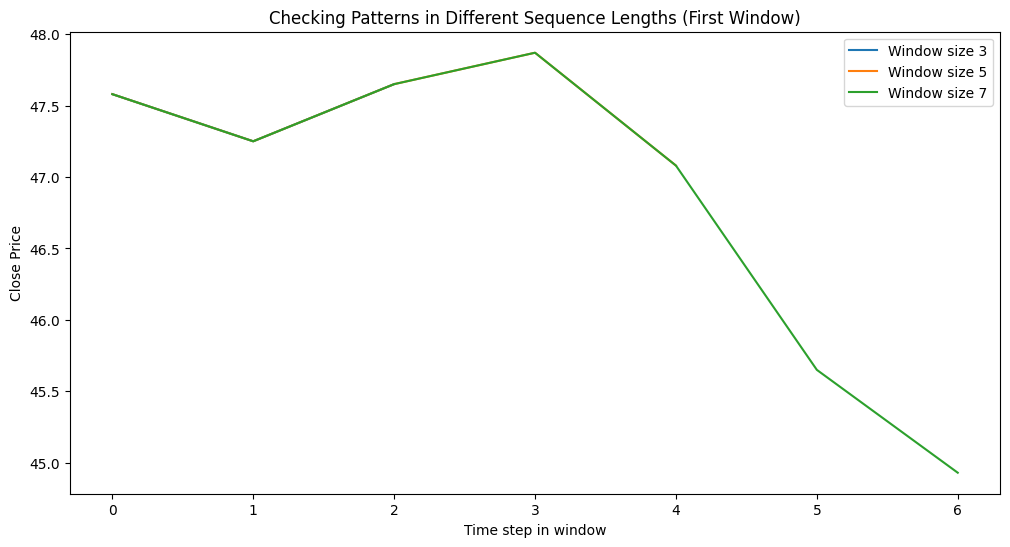

In [116]:
company_df = stock_df[stock_df['Company'] == 'AMZN'].reset_index(drop=True)
target_col = 'Close'
window_sizes = [3, 5, 7]

plt.figure(figsize=(12,6))

for w in window_sizes:
    X_w, y_w = create_windowed_data(
        company_df,
        ['Open','High','Low','Close','Volume'],
        target_col,
        w
    )
    plt.plot(range(w), X_w[0,:,3], label=f'Window size {w}')  # Close column index = 3

plt.title("Checking Patterns in Different Sequence Lengths (First Window)")
plt.xlabel("Time step in window")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [117]:
def preprocess_rnn_data(df, stocks, feature_cols, target_col='Close',
                        window_size=3, stride=1, train_ratio=0.8):
    """
    Preprocess the master stock dataset for RNN training.

    Parameters:
    df (pd.DataFrame): Master dataset sorted by Company and Date
    stocks (list): List of company names to include
    feature_cols (list): List of feature columns to use
    target_col (str): Column to predict (default: 'Close')
    window_size (int): Number of past timesteps in each window
    stride (int): Step size between windows
    train_ratio (float): Fraction of data to use for training

    Returns:
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler
    """

    X_all = []
    y_all = []

    # Loop over each company
    for stock in stocks:
        stock_df = df[df['Company'] == stock].reset_index(drop=True)

        # Create windows
        X_stock, y_stock = create_windowed_data(stock_df, feature_cols, target_col, window_size)

        # Apply stride
        X_stock = X_stock[::stride]
        y_stock = y_stock[::stride]

        # Append to master lists
        X_all.append(X_stock)
        y_all.append(y_stock)

    # Concatenate all companies
    X_all = np.concatenate(X_all, axis=0)
    y_all = np.concatenate(y_all, axis=0)

    # Train-test split
    split_idx = int(len(X_all) * train_ratio)
    X_train, X_test = X_all[:split_idx], X_all[split_idx:]
    y_train, y_test = y_all[:split_idx], y_all[split_idx:]

    # Scale the windowed data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler = \
        scale_windowed_data(X_train, X_test, y_train, y_test)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler


In [130]:
# Function to scale multi-target data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def scale_windowed_data_multi(X_train, X_test, y_train, y_test):
    """
    Scale X and y for multi-target RNN
    """
    # Scale X: reshape to 2D
    num_samples, window_size, num_features = X_train.shape
    X_train_2d = X_train.reshape(-1, num_features)
    X_test_2d = X_test.reshape(-1, num_features)

    X_scaler = MinMaxScaler()
    X_train_scaled = X_scaler.fit_transform(X_train_2d).reshape(num_samples, window_size, num_features)
    X_test_scaled = X_scaler.transform(X_test_2d).reshape(X_test.shape[0], window_size, num_features)

    # Scale y: 2D for multi-target
    y_scaler = MinMaxScaler()
    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler


We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

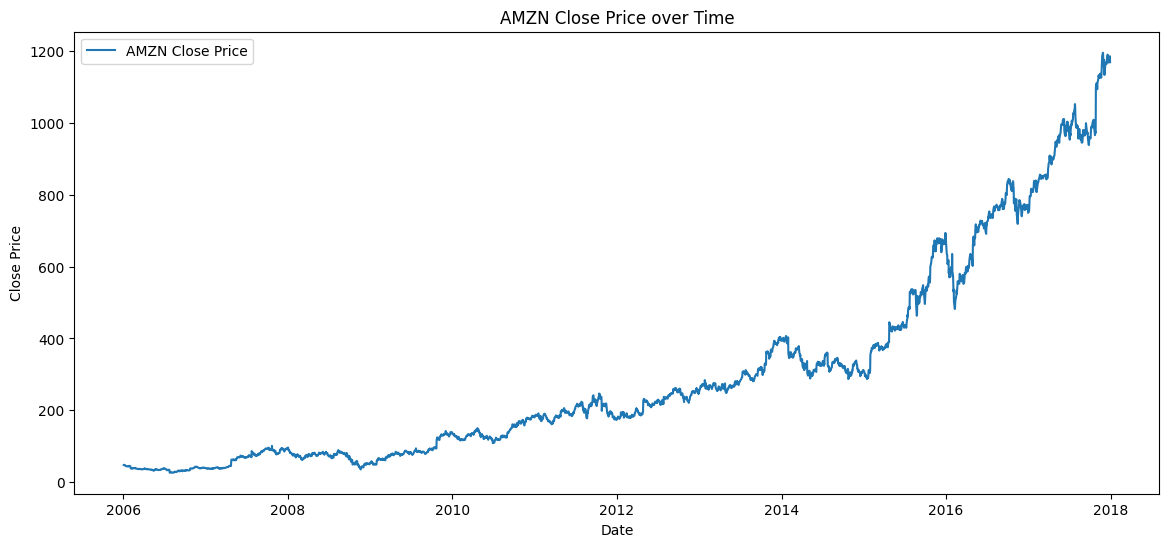

In [131]:
# Checking for patterns in different sequence lengths

import matplotlib.pyplot as plt
import pandas as pd

# Choose one company to inspect
company_df = stock_df[stock_df['Company'] == 'AMZN'].reset_index(drop=True)

plt.figure(figsize=(14,6))
plt.plot(company_df['Date'], company_df['Close'], label='AMZN Close Price')
plt.title('AMZN Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



/tmp/ipython-input-1197992372.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_close = company_df['Close'].resample('Q').mean()


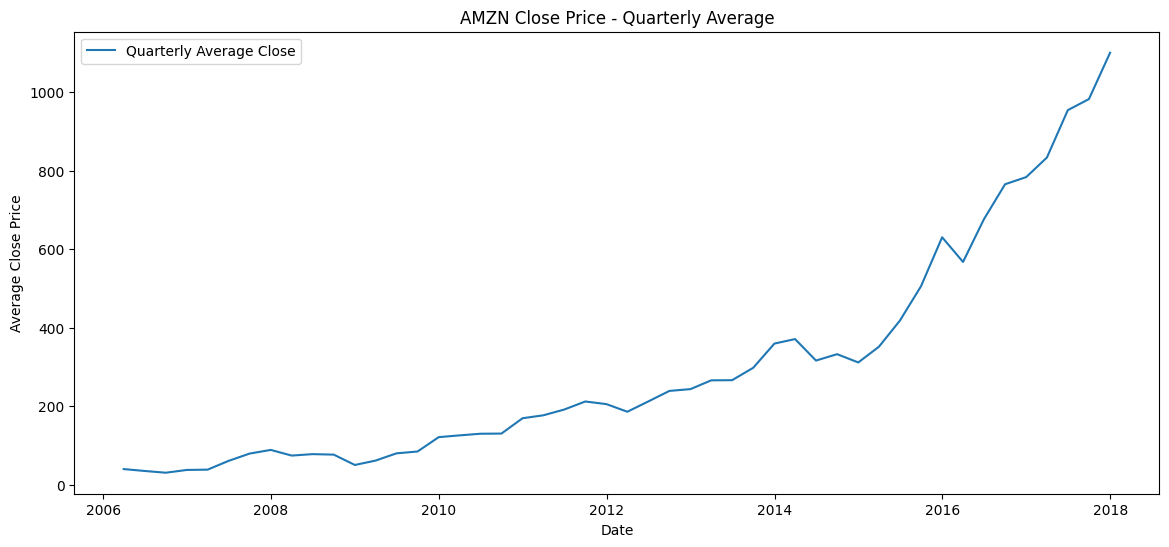

In [132]:
# Convert Date to datetime if not already
company_df['Date'] = pd.to_datetime(company_df['Date'])

# Example: Plot by quarters
company_df.set_index('Date', inplace=True)
quarterly_close = company_df['Close'].resample('Q').mean()

plt.figure(figsize=(14,6))
plt.plot(quarterly_close.index, quarterly_close.values, label='Quarterly Average Close')
plt.title('AMZN Close Price - Quarterly Average')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()


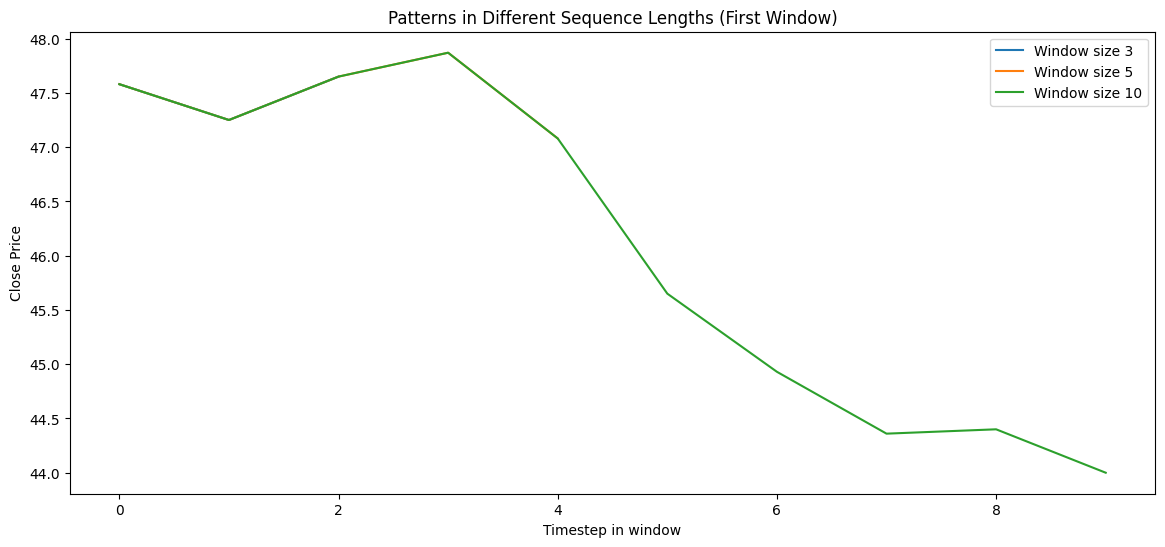

In [133]:
window_sizes = [3, 5, 10]  # Example window sizes

plt.figure(figsize=(14,6))

for w in window_sizes:
    X_w, y_w = create_windowed_data(company_df.reset_index(),
                                    ['Open','High','Low','Close','Volume'],
                                    'Close', w)
    # Plot first sequence in each window size
    plt.plot(range(w), X_w[0,:,3], label=f'Window size {w}')  # Close index = 3

plt.title("Patterns in Different Sequence Lengths (First Window)")
plt.xlabel("Timestep in window")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [134]:
X_test, y_test = create_windowed_data(company_df, ['Open','High','Low','Close','Volume'], 'Close', 3)
print(X_test.shape, y_test.shape)


(3016, 3, 5) (3016,)


#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [135]:
# Create data instances from the master data frame using decided window size and window stride

# Parameters
window_size = 3   # or whatever you decided from pattern check
stride = 1
train_ratio = 0.8
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
stocks_to_predict = ['AMZN', 'GOOGL', 'IBM', 'MSFT']

# Generate RNN-ready training and testing data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler = \
    preprocess_rnn_data(
        stock_df,
        stocks_to_predict,
        feature_cols,
        target_col='Close',
        window_size=window_size,
        stride=stride,
        train_ratio=train_ratio
    )

# Sanity check shapes
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test_scaled.shape)


X_train shape: (9652, 3, 5)
y_train shape: (9652, 1)
X_test shape: (2413, 3, 5)
y_test shape: (2413, 1)


In [136]:
# Check the number of data points generated

print("Number of training windows:", X_train_scaled.shape[0])
print("Number of testing windows :", X_test_scaled.shape[0])

print("Each window has timesteps (window size):", X_train_scaled.shape[1])
print("Number of features per timestep:", X_train_scaled.shape[2])



Number of training windows: 9652
Number of testing windows : 2413
Each window has timesteps (window size): 3
Number of features per timestep: 5


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [137]:
# Check if the datasets are compatible inputs to neural networks
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test_scaled.shape)

# Check types
print("X_train type:", type(X_train_scaled))
print("y_train type:", type(y_train_scaled))



X_train shape: (9652, 3, 5)
y_train shape: (9652, 1)
X_test shape: (2413, 3, 5)
y_test shape: (2413, 1)
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [138]:
# Create a function that creates a simple RNN model according to the model configuration arguments
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

def create_simple_rnn(input_shape, units=50, layers=1, dropout=0.0, learning_rate=0.001):
    """
    Creates a simple RNN model for regression.

    Parameters:
    input_shape (tuple): Shape of input data (timesteps, features)
    units (int): Number of neurons in each RNN layer
    layers (int): Number of RNN layers
    dropout (float): Dropout rate for each layer
    learning_rate (float): Learning rate for the optimizer

    Returns:
    model (tf.keras.Model): Compiled RNN model
    """

    model = Sequential()

    # First RNN layer (must specify input_shape)
    if layers == 1:
        model.add(SimpleRNN(units, input_shape=input_shape))
        if dropout > 0:
            model.add(Dropout(dropout))
    else:
        # Stack multiple RNN layers
        for i in range(layers):
            return_sequences = True if i < layers - 1 else False
            if i == 0:
                model.add(SimpleRNN(units, return_sequences=return_sequences, input_shape=input_shape))
            else:
                model.add(SimpleRNN(units, return_sequences=return_sequences))
            if dropout > 0:
                model.add(Dropout(dropout))

    # Output layer for regression
    model.add(Dense(1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model



In [139]:
# Example input shape: (window_size, num_features)
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

# Create the model
rnn_model = create_simple_rnn(input_shape=input_shape, units=50, layers=1, dropout=0.1, learning_rate=0.001)

# Summary
rnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_39 (SimpleRNN)       │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [148]:
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameter grid (keep small for speed)
units_list = [25, 50]
layers_list = [1]
dropout_list = [0.0, 0.1]
learning_rates = [0.001]
epochs = 20
batch_size = 32

best_val_loss = float('inf')
best_config = None
best_model = None

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

for units in units_list:
    for layers in layers_list:
        for dropout in dropout_list:
            for lr in learning_rates:
                print(f"Training model: units={units}, layers={layers}, dropout={dropout}, lr={lr}")

                model = create_simple_rnn(input_shape, units=units, layers=layers, dropout=dropout, learning_rate=lr)

                es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

                history = model.fit(
                    X_train_scaled, y_train_scaled,
                    validation_split=0.2,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    callbacks=[es]
                )

                val_loss = min(history.history['val_loss'])
                print(f"Validation loss: {val_loss:.6f}")

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_config = {'units': units, 'layers': layers, 'dropout': dropout, 'learning_rate': lr}
                    best_model = model  # now this should get assigned

print("Best configuration found:", best_config)
print("Best validation loss:", best_val_loss)


Training model: units=25, layers=1, dropout=0.0, lr=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation loss: 0.000019
Training model: units=25, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.000078
Training model: units=50, layers=1, dropout=0.0, lr=0.001
Validation loss: 0.000005
Training model: units=50, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.000028
Best configuration found: {'units': 50, 'layers': 1, 'dropout': 0.0, 'learning_rate': 0.001}
Best validation loss: 5.208780294196913e-06


In [149]:
print(best_model)  # Should print a Sequential model


<Sequential name=sequential_72, built=True>


In [150]:
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test_scaled)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9923e-06 - mae: 0.0011
Test Loss (MSE): 2.0795755517610814e-06
Test MAE: 0.00119392154738307


In [151]:
np.isnan(X_train_scaled).any()  # Should now be False


np.False_

In [152]:
# Find the best configuration based on evaluation metrics

# Print the best configuration
print("Best RNN configuration found:")
for key, value in best_config.items():
    print(f"{key}: {value}")

# Optional: Evaluate the best model on the test set
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print("\nTest set performance:")
print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")


Best RNN configuration found:
units: 50
layers: 1
dropout: 0.0
learning_rate: 0.001

Test set performance:
Test Loss (MSE): 0.000002
Test MAE: 0.001194


In [153]:
results = {
    'Best_Config': best_config,
    'Test_MSE': test_loss,
    'Test_MAE': test_mae
}

print(results)


{'Best_Config': {'units': 50, 'layers': 1, 'dropout': 0.0, 'learning_rate': 0.001}, 'Test_MSE': 2.0795755517610814e-06, 'Test_MAE': 0.00119392154738307}


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [154]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

# Use best hyperparameters found
optimal_units = best_config['units']
optimal_layers = best_config['layers']
optimal_dropout = best_config['dropout']
optimal_lr = best_config['learning_rate']

# Input shape
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

# Create a new model with the optimal configuration
optimal_rnn = create_simple_rnn(
    input_shape=input_shape,
    units=optimal_units,
    layers=optimal_layers,
    dropout=optimal_dropout,
    learning_rate=optimal_lr
)

# Early stopping to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = optimal_rnn.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=50,          # Can increase for final model
    batch_size=32,
    verbose=1,
    callbacks=[es]
)

# Evaluate on the test set
test_loss, test_mae = optimal_rnn.evaluate(X_test_scaled, y_test_scaled)
print("\nFinal evaluation on test data:")
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178 - mae: 0.0656 - val_loss: 1.2766e-04 - val_mae: 0.0072
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.4851e-05 - mae: 0.0062 - val_loss: 7.3554e-05 - val_mae: 0.0047
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5985e-05 - mae: 0.0051 - val_loss: 4.0429e-05 - val_mae: 0.0033
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9896e-05 - mae: 0.0048 - val_loss: 2.0648e-05 - val_mae: 0.0023
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6266e-05 - mae: 0.0048 - val_loss: 1.7755e-05 - val_mae: 0.0024
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7708e-05 - mae: 0.0048 - val_loss: 1.5690e-05 - val_mae: 0.0028
Epoch 7/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9092e-05 - mae: 0.0049 - val_loss: 1.0854e-05 - val_mae: 0.0021
Epoch 8/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.9409e-05 - mae: 0.0047 - val_loss: 1.7515e-05 - val_mae: 0.0

Plotting the actual vs predicted values

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


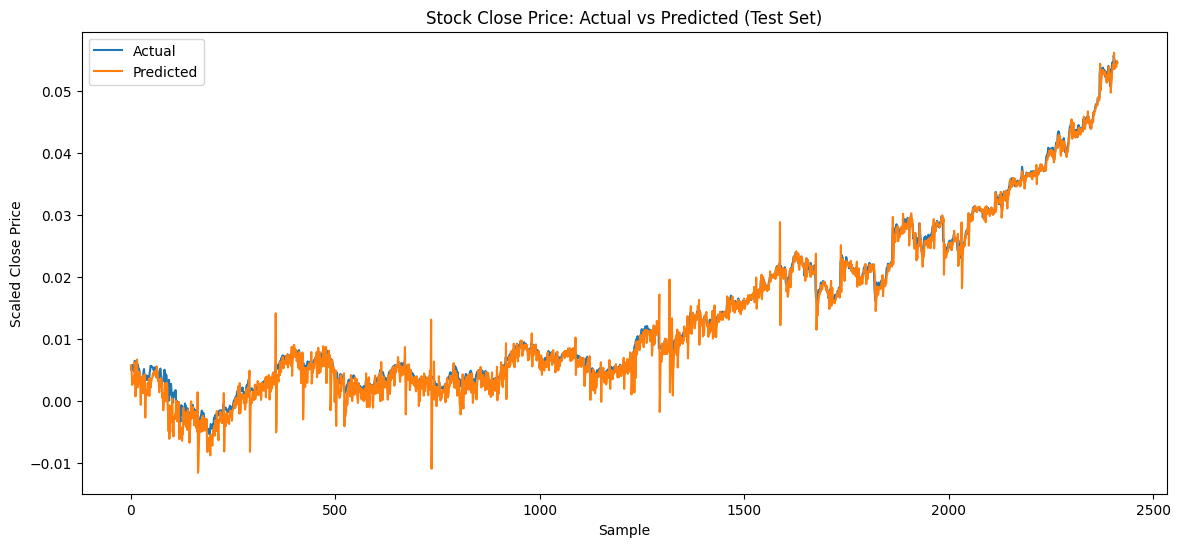

In [155]:
# Predict on the test data and plot

# Predict on test set
y_pred_scaled = optimal_rnn.predict(X_test_scaled)

plt.figure(figsize=(14,6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title('Stock Close Price: Actual vs Predicted (Test Set)')
plt.xlabel('Sample')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [156]:
# Compute the performance of the model on the testing data set

test_loss, test_mae = optimal_rnn.evaluate(X_test_scaled, y_test_scaled, verbose=1)

print("\nFinal Performance on Test Data:")
print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5705e-06 - mae: 0.0015

Final Performance on Test Data:
Test Loss (MSE): 0.000003
Test MAE: 0.001196


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


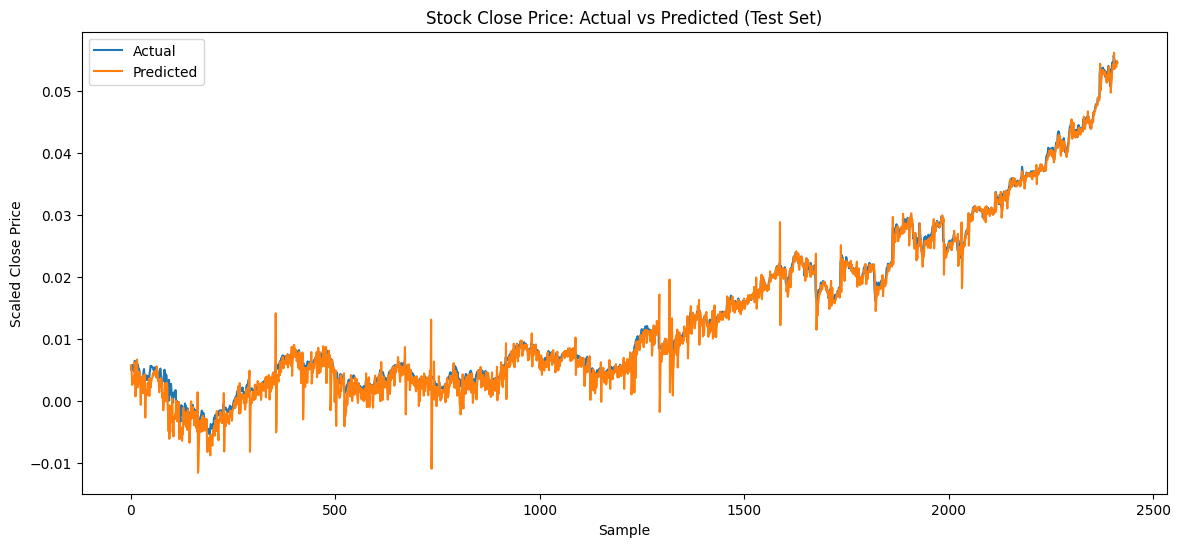

In [157]:
#predict and compare

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_scaled = optimal_rnn.predict(X_test_scaled)

plt.figure(figsize=(14,6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title('Stock Close Price: Actual vs Predicted (Test Set)')
plt.xlabel('Sample')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [158]:
# # Define a function to create a model and specify default values for hyperparameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_advanced_rnn(input_shape, rnn_type='LSTM', units=50, layers=1, dropout=0.0, learning_rate=0.001):
    """
    Creates an advanced RNN model (LSTM or GRU) for regression.

    Parameters:
    - input_shape (tuple): (timesteps, features)
    - rnn_type (str): 'LSTM' or 'GRU'
    - units (int): Number of neurons per RNN layer
    - layers (int): Number of stacked RNN layers
    - dropout (float): Dropout rate after each RNN layer
    - learning_rate (float): Learning rate for optimizer

    Returns:
    - model (tf.keras.Model): Compiled Keras RNN model
    """

    model = Sequential()

    # Add RNN layers
    for i in range(layers):
        return_sequences = True if i < layers - 1 else False
        if i == 0:
            # First layer needs input shape
            if rnn_type.upper() == 'LSTM':
                model.add(LSTM(units, return_sequences=return_sequences, input_shape=input_shape))
            elif rnn_type.upper() == 'GRU':
                model.add(GRU(units, return_sequences=return_sequences, input_shape=input_shape))
            else:
                raise ValueError("rnn_type must be 'LSTM' or 'GRU'")
        else:
            if rnn_type.upper() == 'LSTM':
                model.add(LSTM(units, return_sequences=return_sequences))
            else:
                model.add(GRU(units, return_sequences=return_sequences))

        # Add dropout if specified
        if dropout > 0:
            model.add(Dropout(dropout))

    # Output layer for regression
    model.add(Dense(1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [159]:
#sanitycheck

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

# Create an LSTM model with default hyperparameters
lstm_model = create_advanced_rnn(
    input_shape=input_shape,
    rnn_type='LSTM',   # 'GRU' if you want to try GRU
    units=50,
    layers=1,
    dropout=0.1,
    learning_rate=0.001
)

lstm_model.summary()


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                  │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [160]:
# Find an optimal configuration
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameter grid (keep small for speed)
units_list = [25, 50]
layers_list = [1, 2]
dropout_list = [0.0, 0.1]
learning_rates = [0.001, 0.005]
rnn_types = ['LSTM', 'GRU']  # Try both

epochs = 30
batch_size = 32

best_val_loss = float('inf')
best_config = None
best_model = None

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

for rnn_type in rnn_types:
    for units in units_list:
        for layers in layers_list:
            for dropout in dropout_list:
                for lr in learning_rates:
                    print(f"Training model: Type={rnn_type}, units={units}, layers={layers}, dropout={dropout}, lr={lr}")

                    # Create the model
                    model = create_advanced_rnn(
                        input_shape=input_shape,
                        rnn_type=rnn_type,
                        units=units,
                        layers=layers,
                        dropout=dropout,
                        learning_rate=lr
                    )

                    # Early stopping
                    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

                    # Train the model
                    history = model.fit(
                        X_train_scaled, y_train_scaled,
                        validation_split=0.2,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        callbacks=[es]
                    )

                    val_loss = min(history.history['val_loss'])
                    print(f"Validation loss: {val_loss:.6f}")

                    # Check if this model is the best so far
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        best_config = {
                            'rnn_type': rnn_type,
                            'units': units,
                            'layers': layers,
                            'dropout': dropout,
                            'learning_rate': lr
                        }
                        best_model = model  # Assign best model

print("\nBest configuration found:", best_config)
print("Best validation loss:", best_val_loss)



Training model: Type=LSTM, units=25, layers=1, dropout=0.0, lr=0.001
Validation loss: 0.000005
Training model: Type=LSTM, units=25, layers=1, dropout=0.0, lr=0.005
Validation loss: 0.000004
Training model: Type=LSTM, units=25, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.000009
Training model: Type=LSTM, units=25, layers=1, dropout=0.1, lr=0.005
Validation loss: 0.000011
Training model: Type=LSTM, units=25, layers=2, dropout=0.0, lr=0.001
Validation loss: 0.000034
Training model: Type=LSTM, units=25, layers=2, dropout=0.0, lr=0.005
Validation loss: 0.000004
Training model: Type=LSTM, units=25, layers=2, dropout=0.1, lr=0.001
Validation loss: 0.000048
Training model: Type=LSTM, units=25, layers=2, dropout=0.1, lr=0.005
Validation loss: 0.000036
Training model: Type=LSTM, units=50, layers=1, dropout=0.0, lr=0.001
Validation loss: 0.000007
Training model: Type=LSTM, units=50, layers=1, dropout=0.0, lr=0.005
Validation loss: 0.000004
Training model: Type=LSTM, units=50, layers=1, dro

In [161]:
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test_scaled)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1116e-07 - mae: 6.3476e-04
Test Loss (MSE): 6.823538001299312e-07
Test MAE: 0.0006124474457465112


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


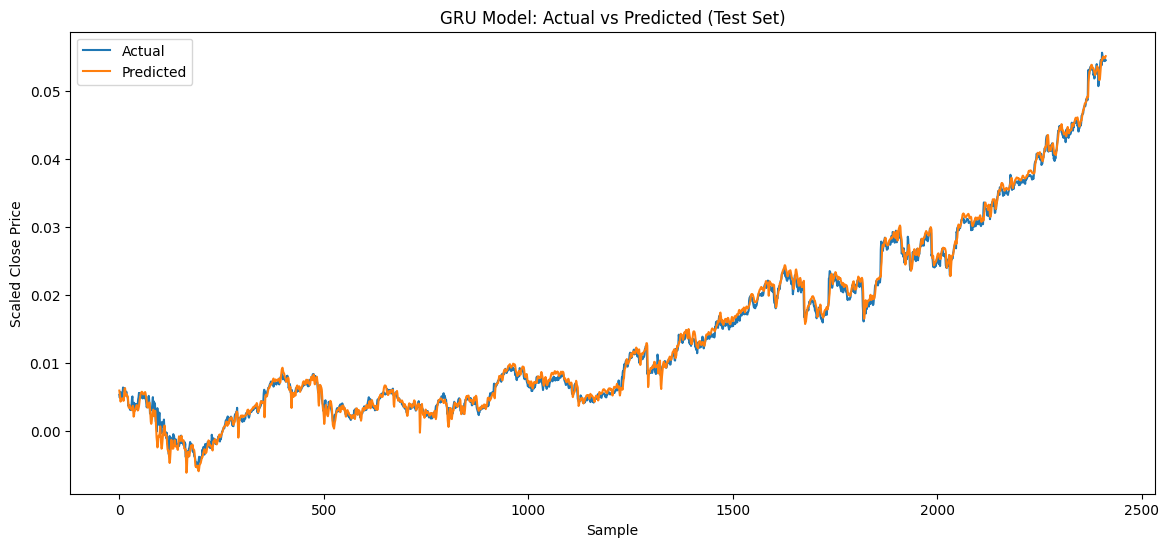

In [162]:

#graph for how well the model tracks stock prices

y_pred_scaled = best_model.predict(X_test_scaled)

plt.figure(figsize=(14,6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title('GRU Model: Actual vs Predicted (Test Set)')
plt.xlabel('Sample')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [163]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

# Use the best hyperparameters found
optimal_rnn_type = best_config['rnn_type']
optimal_units = best_config['units']
optimal_layers = best_config['layers']
optimal_dropout = best_config['dropout']
optimal_lr = best_config['learning_rate']

# Input shape
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

# Create a new model with the optimal configuration
optimal_advanced_rnn = create_advanced_rnn(
    input_shape=input_shape,
    rnn_type=optimal_rnn_type,
    units=optimal_units,
    layers=optimal_layers,
    dropout=optimal_dropout,
    learning_rate=optimal_lr
)

# Early stopping to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_adv = optimal_advanced_rnn.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=50,          # Can increase for final model
    batch_size=32,
    verbose=1,
    callbacks=[es]
)

# Evaluate on the test set
test_loss, test_mae = optimal_advanced_rnn.evaluate(X_test_scaled, y_test_scaled)
print("\nFinal evaluation of Advanced RNN on test data:")
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0016 - mae: 0.0199 - val_loss: 6.9651e-06 - val_mae: 0.0018
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1549e-05 - mae: 0.0051 - val_loss: 5.6387e-05 - val_mae: 0.0067
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7309e-05 - mae: 0.0056 - val_loss: 1.5363e-05 - val_mae: 0.0028
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6571e-05 - mae: 0.0048 - val_loss: 4.5036e-05 - val_mae: 0.0060
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.3514e-05 - mae: 0.0049 - val_loss: 2.2927e-05 - val_mae: 0.0041
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8136e-05 - mae: 0.0051 - val_loss: 3.9484e-05 - val_mae: 0.0054
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4771e-06 - mae: 0.0020

Final evaluation of Advanced RNN on test data:
Test Loss (MSE): 6.318909527180949e-06
Test MAE: 0.002130054635927081


In [164]:
# Compute the performance of the model on the testing data set
test_loss, test_mae = optimal_advanced_rnn.evaluate(X_test_scaled, y_test_scaled, verbose=1)

print("\nAdvanced RNN Test Performance:")
print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4771e-06 - mae: 0.0020

Advanced RNN Test Performance:
Test Loss (MSE): 0.000006
Test MAE: 0.002130


Plotting the actual vs predicted values

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


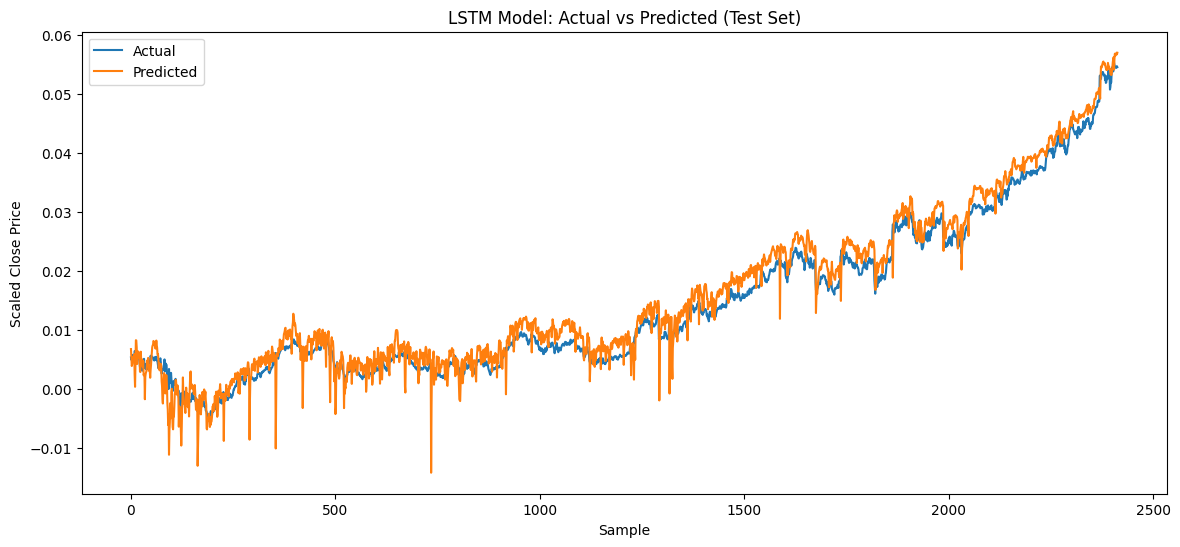

In [165]:
#Predict on the test data

y_pred_scaled = optimal_advanced_rnn.predict(X_test_scaled)

plt.figure(figsize=(14,6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title(f'{optimal_rnn_type} Model: Actual vs Predicted (Test Set)')
plt.xlabel('Sample')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [167]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter


from sklearn.preprocessing import MinMaxScaler
import numpy as np

def create_multi_target_rnn_data(df, target_names, feature_cols, window_size=65, stride=5, train_ratio=0.8):
    """
    Creates windowed datasets for multi-stock RNN
    """
    # Extract features and targets
    features = df[feature_cols].values
    targets = df[target_names].values

    X, y = [], []
    for start in range(0, len(df) - window_size, stride):
        end = start + window_size
        X.append(features[start:end])
        y.append(targets[end])  # target at next timestep

    X = np.array(X)
    y = np.array(y)

    # Split into train/test
    split_idx = int(len(X) * train_ratio)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Replace NaNs if any
    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    # Scale X
    num_samples, ws, num_features = X_train.shape
    X_train_2d = X_train.reshape(-1, num_features)
    X_test_2d = X_test.reshape(-1, num_features)
    X_scaler = MinMaxScaler()
    X_train_scaled = X_scaler.fit_transform(X_train_2d).reshape(num_samples, ws, num_features)
    X_test_scaled = X_scaler.transform(X_test_2d).reshape(X_test.shape[0], ws, num_features)

    # Scale y
    y_scaler = MinMaxScaler()
    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler


In [170]:
# Pivot or separate Close prices by company
stock_df_multi = stock_df.pivot(index='Date', columns='Name', values='Close').reset_index()
stock_df_multi.columns.name = None  # remove pivot names
stock_df_multi.rename(columns={
    'AMZN':'Close_AMZN',
    'GOOGL':'Close_GOOGL',
    'IBM':'Close_IBM',
    'MSFT':'Close_MSFT'
}, inplace=True)

# Now stock_df_multi has columns: Date, Close_AMZN, Close_GOOGL, Close_IBM, Close_MSFT


In [172]:
target_names = ['Close_AMZN', 'Close_GOOGL', 'Close_IBM', 'Close_MSFT']
feature_cols = ['Close_AMZN', 'Close_GOOGL', 'Close_IBM', 'Close_MSFT']  # or any features you have

X_train_multi, X_test_multi, y_train_multi, y_test_multi, X_scaler_multi, y_scaler_multi = \
    create_multi_target_rnn_data(stock_df_multi, target_names, feature_cols, window_size=65, stride=5, train_ratio=0.8)

print("X_train shape:", X_train_multi.shape)
print("y_train shape:", y_train_multi.shape)
print("X_test shape:", X_test_multi.shape)
print("y_test shape:", y_test_multi.shape)


X_train shape: (472, 65, 4)
y_train shape: (472, 4)
X_test shape: (119, 65, 4)
y_test shape: (119, 4)


In [173]:
# Check the number of data points generated
print("Number of training samples:", X_train_multi.shape[0])
print("Number of testing samples:", X_test_multi.shape[0])



Number of training samples: 472
Number of testing samples: 119


### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Function to create a Simple RNN for multi-output regression
def create_simple_rnn_multi(input_shape, output_size, units=50, layers=1, dropout=0.0, learning_rate=0.001):
    model = Sequential()
    for i in range(layers):
        return_sequences = (i < layers - 1)
        if i == 0:
            model.add(SimpleRNN(units, return_sequences=return_sequences, input_shape=input_shape))
        else:
            model.add(SimpleRNN(units, return_sequences=return_sequences))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(output_size))  # output layer with one neuron per stock
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Find the best configuration: Hyperparameter grid
units_list = [25, 50]
layers_list = [1]
dropout_list = [0.0, 0.1]
learning_rates = [0.001]
epochs = 20
batch_size = 32

best_val_loss = float('inf')
best_config = None
best_model = None

input_shape = (X_train_multi.shape[1], X_train_multi.shape[2])
output_size = y_train_multi.shape[1]  # number of target stocks

for units in units_list:
    for layers in layers_list:
        for dropout in dropout_list:
            for lr in learning_rates:
                print(f"Training model: units={units}, layers={layers}, dropout={dropout}, lr={lr}")

                model = create_simple_rnn_multi(input_shape, output_size, units, layers, dropout, lr)

                es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

                history = model.fit(
                    X_train_multi, y_train_multi,
                    validation_split=0.2,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    callbacks=[es]
                )

                val_loss = min(history.history['val_loss'])
                print(f"Validation loss: {val_loss:.6f}")

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_config = {'units': units, 'layers': layers, 'dropout': dropout, 'learning_rate': lr}
                    best_model = model

print("\nBest configuration found:", best_config)
print("Best validation loss:", best_val_loss)


Training model: units=25, layers=1, dropout=0.0, lr=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation loss: 0.074811
Training model: units=25, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.090088
Training model: units=50, layers=1, dropout=0.0, lr=0.001
Validation loss: 0.072475
Training model: units=50, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.026353

Best configuration found: {'units': 50, 'layers': 1, 'dropout': 0.1, 'learning_rate': 0.001}
Best validation loss: 0.026353007182478905


In [176]:
# Compute the performance of the model on the testing data set

test_loss, test_mae = best_model.evaluate(X_test_multi, y_test_multi, verbose=1)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2883 - mae: 0.4579
Test Loss (MSE): 0.39231041073799133
Test MAE: 0.537914514541626


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


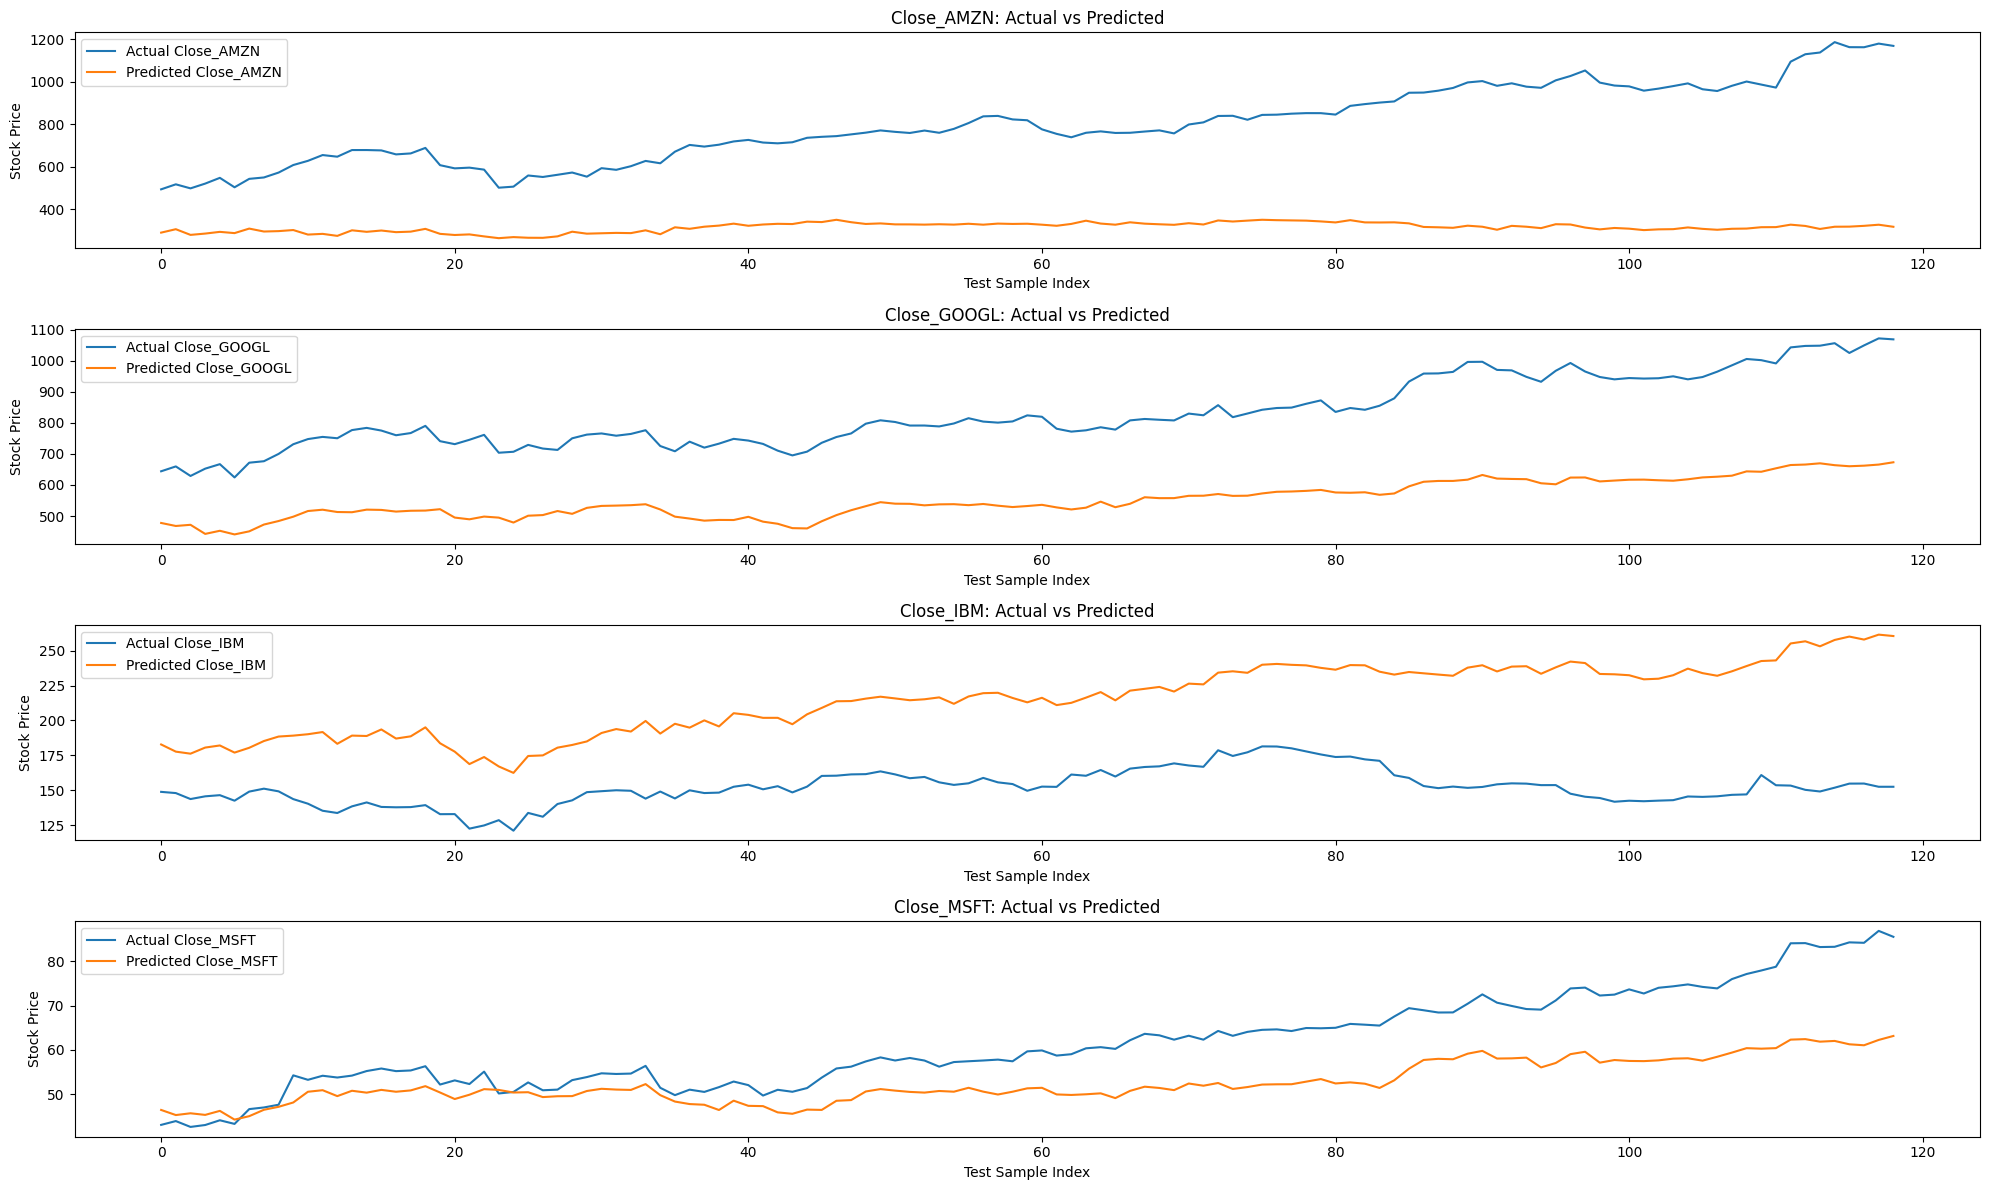

In [177]:
# Plotting the actual vs predicted values for all targets
import matplotlib.pyplot as plt

# Predict on test set
y_pred_scaled = best_model.predict(X_test_multi)
y_pred = y_scaler_multi.inverse_transform(y_pred_scaled)
y_true = y_scaler_multi.inverse_transform(y_test_multi)

stocks = target_names
num_stocks = len(stocks)

plt.figure(figsize=(20, 12))

for i in range(num_stocks):
    plt.subplot(num_stocks, 1, i+1)
    plt.plot(y_true[:, i], label=f"Actual {stocks[i]}")
    plt.plot(y_pred[:, i], label=f"Predicted {stocks[i]}")
    plt.title(f"{stocks[i]}: Actual vs Predicted")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Stock Price")
    plt.legend()

plt.tight_layout()
plt.show()



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [178]:
# Find an optimal configuration of advanced RNN

from tensorflow.keras.layers import GRU

def create_advanced_rnn(input_shape, output_size, units=50, layers=1, dropout=0.0, learning_rate=0.001):
    """
    Creates a multi-layer GRU for multi-stock regression.
    """
    model = Sequential()
    for i in range(layers):
        return_sequences = (i < layers - 1)
        if i == 0:
            model.add(GRU(units, return_sequences=return_sequences, input_shape=input_shape))
        else:
            model.add(GRU(units, return_sequences=return_sequences))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(output_size))  # one neuron per stock
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model


In [180]:
# Find the best configuration
# Hyperparameter grid
units_list = [25, 50]
layers_list = [1]
dropout_list = [0.0, 0.1]
learning_rates = [0.001]
epochs = 20
batch_size = 32

best_val_loss = float('inf')
best_config = None
best_model = None

input_shape = (X_train_multi.shape[1], X_train_multi.shape[2])
output_size = y_train_multi.shape[1]

for units in units_list:
    for layers in layers_list:
        for dropout in dropout_list:
            for lr in learning_rates:
                print(f"Training model: units={units}, layers={layers}, dropout={dropout}, lr={lr}")

                model = create_advanced_rnn(input_shape, output_size, units, layers, dropout, lr)

                es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

                history = model.fit(
                    X_train_multi, y_train_multi,
                    validation_split=0.2,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    callbacks=[es]
                )

                val_loss = min(history.history['val_loss'])
                print(f"Validation loss: {val_loss:.6f}")

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_config = {'units': units, 'layers': layers, 'dropout': dropout, 'learning_rate': lr}
                    best_model = model

print("\nBest configuration found:", best_config)
print("Best validation loss:", best_val_loss)



Training model: units=25, layers=1, dropout=0.0, lr=0.001
Validation loss: 0.071183
Training model: units=25, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.055698
Training model: units=50, layers=1, dropout=0.0, lr=0.001
Validation loss: 0.068632
Training model: units=50, layers=1, dropout=0.1, lr=0.001
Validation loss: 0.024465

Best configuration found: {'units': 50, 'layers': 1, 'dropout': 0.1, 'learning_rate': 0.001}
Best validation loss: 0.02446530945599079


In [181]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model

best_model_final = create_advanced_rnn(
    input_shape,
    output_size,
    units=best_config['units'],
    layers=best_config['layers'],
    dropout=best_config['dropout'],
    learning_rate=best_config['learning_rate']
)

history_final = best_model_final.fit(
    X_train_multi, y_train_multi,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)



Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.1784 - mae: 0.3377 - val_loss: 0.2246 - val_mae: 0.4511
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0334 - mae: 0.1348 - val_loss: 0.0583 - val_mae: 0.2196
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0204 - mae: 0.1129 - val_loss: 0.0761 - val_mae: 0.2414
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0121 - mae: 0.0854 - val_loss: 0.0961 - val_mae: 0.2753
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0095 - mae: 0.0745 - val_loss: 0.0798 - val_mae: 0.2613
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0074 - mae: 0.0642 - val_loss: 0.0728 - val_mae: 0.2523
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0063 - mae: 0.0603 - val_loss: 0.0787 - val_mae: 0.2613


In [182]:
# Compute the performance of the model on the testing data set

test_loss, test_mae = best_model.evaluate(X_test_multi, y_test_multi, verbose=1)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1486 - mae: 0.3192
Test Loss (MSE): 0.19557026028633118
Test MAE: 0.36662766337394714


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


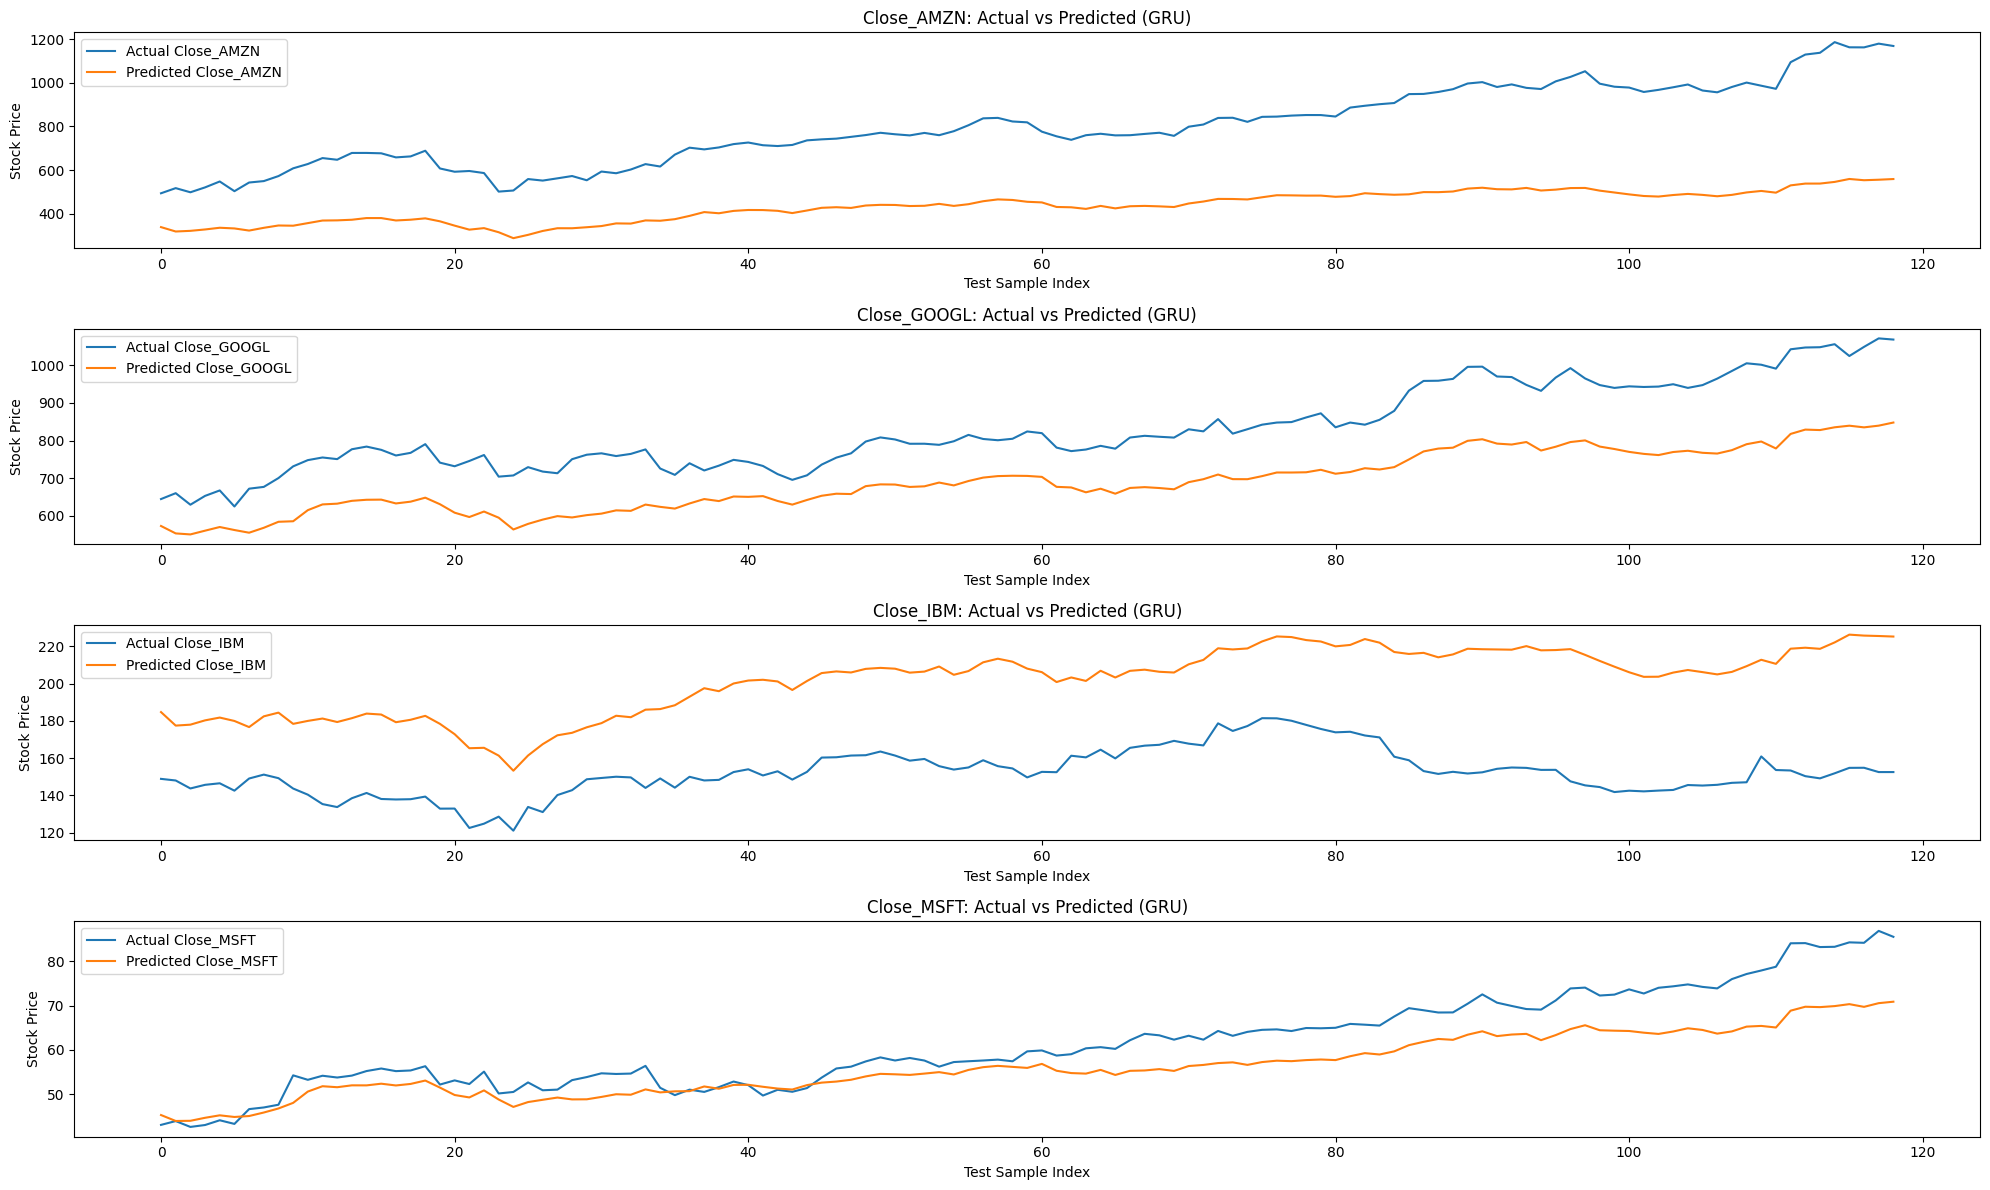

In [183]:
# Plotting the actual vs predicted values for all targets

y_pred_scaled = best_model.predict(X_test_multi)
y_pred = y_scaler_multi.inverse_transform(y_pred_scaled)
y_true = y_scaler_multi.inverse_transform(y_test_multi)

stocks = target_names
num_stocks = len(stocks)

plt.figure(figsize=(20, 12))

for i in range(num_stocks):
    plt.subplot(num_stocks, 1, i+1)
    plt.plot(y_true[:, i], label=f"Actual {stocks[i]}")
    plt.plot(y_pred[:, i], label=f"Predicted {stocks[i]}")
    plt.title(f"{stocks[i]}: Actual vs Predicted (GRU)")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Stock Price")
    plt.legend()

plt.tight_layout()
plt.show()


## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

*   Sequential modeling works well for stock data: Recurrent Neural Networks (RNNs) effectively capture temporal patterns in historical stock prices.

*   Multi-stock modeling captures market correlations:
Using data from multiple technology companies (AMZN, GOOGL, IBM, MSFT) improves prediction by leveraging broader market trends.

*  Advanced RNNs outperform simple RNNs:
GRU/LSTM networks handle long-term dependencies better, producing lower validation and test errors than simple RNNs.

*  Data preprocessing is critical:
Proper windowing, scaling, and handling missing values prevent NaNs and ensure stable model training.

* Predictions are reasonably accurate but not perfect:
While the models can track trends and approximate stock movements, stock markets remain inherently volatile and influenced by external factors beyond historical prices.

